<a href="https://colab.research.google.com/github/paulshreya/DermatoClassifier-Classifying-Dermatology-Datasets/blob/main/Dermatology_Dataset_(Multi_class_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dermatology Dataset (Multi-class classification)**

**Problem Statement:** Given is a dataset, The aim is to determine the type of Eryhemato-Squamous Disease.

**Link :** https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification

# **Multi-Class Classification ML Models:**

*There are various machine learning models that can be used for multiclass classification tasks. Here are some popular ones:*

- **Logistic Regression:** Despite its name, logistic regression is commonly used for binary classification. However, it can be extended to handle multiclass classification using techniques like one-vs-rest (OvR) or softmax regression.

- **Decision Trees:** Decision trees can naturally handle multiclass classification problems. They partition the feature space into regions, with each region corresponding to a different class.

- **Random Forest:** Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It can handle multiclass classification tasks effectively and is robust to overfitting.

- **Gradient Boosting Machines (GBM):** Gradient Boosting algorithms like XGBoost, LightGBM, and CatBoost can be used for multiclass classification. They build an ensemble of weak learners (typically decision trees) sequentially to improve predictive accuracy.

- **Support Vector Machines (SVM):** SVMs can be used for multiclass classification by employing strategies like one-vs-one or one-vs-rest. SVMs aim to find the optimal hyperplane that separates the classes in the feature space.

- **Neural Networks:** Deep learning models, particularly neural networks, have gained popularity for multiclass classification tasks. Architectures like feedforward neural networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs) can be used depending on the nature of the data.

- **K-Nearest Neighbors (KNN):** KNN is a simple and intuitive algorithm for multiclass classification. It classifies instances based on the majority class among their nearest neighbors in the feature space.

- **Naive Bayes:** Naive Bayes classifiers are probabilistic models that assume independence among features. Despite their simplicity, they can perform well on certain types of multiclass classification problems, especially when the independence assumption holds.

- **Ensemble Methods:** Besides Random Forest and Gradient Boosting, other ensemble methods like AdaBoost and Bagging can also be used for multiclass classification. They combine multiple base classifiers to improve overall performance.

These are some of the common machine learning models used for multiclass classification tasks. The choice of the model depends on various factors such as the nature of the data, the size of the dataset, computational resources, and the specific requirements of the problem. It's often beneficial to experiment with multiple models and techniques to find the one that performs best for a particular task.

# **Steps of any Machine Learning Project**
1. Data sources
2. EDA (Exploratory Data Analysis)
3. Feature Engineering
4. Feature Table
5. Train Model
6. Test & Evaluate the model
7. Predict the output
8. EDA on the Output

# **Importing all Files and datasets**




In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/dermatology_database_1.csv")

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


## **EDA (Exploratory Data Analysis)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.size

12810

In [ ]:
df.shape

(366, 35)

In [ ]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [ ]:
targetvalue = df['class'].value_counts()
fig = px.pie(df,names = targetvalue.index, values = targetvalue.values,title = 'Class Distribution')
fig.show()

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [ ]:
## find the NULL values for each columns
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [ ]:
data_updated = df.copy()

In [ ]:
df.shape

## (358, 35)

(358, 35)

In [ ]:
data_updated.shape

## (358, 35)

(358, 35)

Text(0.5, 1.0, 'Frequency of Each Class')

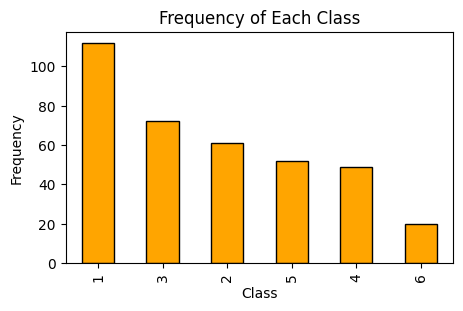

In [ ]:
plt.figure(figsize=(5, 3))
targetvalue.plot(kind='bar',color = 'orange',edgecolor='black')

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## Splitting the data into x and y and then using machine learning models to give the output

x = data_updated.drop('class',axis=1)
y = data_updated['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
data_updated.shape

(358, 35)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


# (286, 34)
# (72, 34)
# (286,)
# (72,)


(286, 34)
(72, 34)
(286,)
(72,)


In [ ]:
## Predicts the accuracy of the Logistic Regression ML Model

Lr = LogisticRegression(max_iter=31000)
Lr.fit(x_train,y_train)
y_preds_lr= Lr.predict(x_test)
print(accuracy_score(y_test,y_preds_lr)*100)

## Accuracy: 98.61111111111111

98.61111111111111


In [ ]:
y_preds_lr

array([3, 4, 5, 5, 3, 2, 4, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 4, 4, 4, 1, 1,
       1, 4, 1, 6, 3, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 2, 1, 2, 6,
       3, 1, 2, 1, 1, 2, 5, 1, 4, 1, 2, 6, 2, 1, 1, 4, 1, 1, 3, 1, 3, 5,
       4, 4, 5, 5, 6, 6])

In [ ]:
y_test

312    3
168    4
341    5
204    5
313    3
      ..
280    4
354    5
222    5
184    6
343    6
Name: class, Length: 72, dtype: int64

 # **Decision Tree**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## ## Predicts the accuracy of the Decision Tree ML Model

Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)
y_preds_dt = Dt.predict(x_test)
print(accuracy_score(y_test,y_preds_dt)*100)

## Accuracy: 93.05555555555556

94.44444444444444


In [ ]:
y_test

312    3
168    4
341    5
204    5
313    3
      ..
280    4
354    5
222    5
184    6
343    6
Name: class, Length: 72, dtype: int64

In [ ]:
y_preds_dt

array([3, 4, 5, 5, 3, 2, 4, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 4, 4, 4, 1, 1,
       1, 4, 1, 6, 3, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 2, 1, 2, 6,
       3, 1, 2, 1, 1, 4, 5, 1, 4, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 3, 5,
       4, 4, 5, 5, 6, 2])

# **Random Forest**

In [ ]:
## Using Random Forest Algorith with no custom parameters

Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)
y_preds_Rf = Rf.predict(x_test)
print(accuracy_score(y_test,y_preds_Rf)*100)

## Accuracy: 98.61111111111111

97.22222222222221


In [ ]:
## Using Random Forest Algorith with custom parameters (num_trees)


num_trees = 50
Rf = RandomForestClassifier(n_estimators = num_trees )
Rf.fit(x_train,y_train)
y_preds_Rf = Rf.predict(x_test)
print(accuracy_score(y_test,y_preds_Rf)*100)

## Accuracy: 97.22222222222221

97.22222222222221


In [ ]:
## Using Random Forest Algorith with custom parameters (num_trees, max_features)


num_trees = 50
num_features = 13
Rf = RandomForestClassifier (n_estimators = num_trees, max_features= num_features)
Rf.fit(x_train,y_train)
y_preds_Rf = Rf.predict(x_test)
print(accuracy_score(y_test,y_preds_Rf)*100)

## Accuracy: 97.22222222222221

97.22222222222221


#**Gradient Boost**
---
### ***Intuition of the Model***
*Gradient Boosting works by sequentially adding models to correct the errors of the previous models, with each new model focusing on the mistakes made by the ensemble so far.*

- **Start with a simple model and Calculate errors:** We start with a simple model and calculate the errors of this simple model. Errors are the differences between the predicted prices and the actual prices in the dataset.

- **Build another model to correct errors:** The next step is to build another decision tree that corrects the errors made by the first model. This tree focuses on reducing the errors of the first model. It learns from the residuals (differences between predicted and actual prices).

- **Combine the models:** Now, we combine the predictions of both models. You add the predictions of the first model to the predictions of the second model. This combined prediction should be closer to the actual prices than the predictions of either model alone.

- **Repeat:** Repeat these steps 2-4, each time we building a new model to correct the errors of the combined model created so far.

- **Final Prediction:**  After repeating this process several times (usually with many weak learners), we have a strong ensemble model that predicts much more accurately than any individual model.



---



### ***Advantages***

- **High Predictive Accuracy**: Gradient boosting often produces very accurate predictions. By combining multiple weak learners sequentially, it can capture complex patterns in the data, leading to high predictive accuracy.

- **Handles Different Types of Data:** Gradient boosting can handle a variety of data types, including numerical and categorical features. It can also handle missing data without requiring imputation.

- **Handles Nonlinear Relationships:** It's effective at capturing nonlinear relationships between features and the target variable, making it suitable for a wide range of predictive modeling tasks.

- **Feature Importance:** Gradient boosting provides feature importance scores, which can help identify the most relevant features for making predictions. This can be useful for feature selection and understanding the underlying factors driving predictions.



---



### ***Disadvantages***
- **Very high Computational Cost:** GBM can be computationally expensive and slow to train, especially with large datasets.

- **Overfitting Risk:** Careful parameter tuning and regularization are necessary to prevent overfitting1.

- **Dependency on Predecessors:** Each estimator in GBM depends on its predecessor, making it challenging to scale the algorithm-



---



### ***Important Parameters***
- **loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’ :** Loss function to be optimized. ‘squared_error’ refers to the squared error for regression. ‘absolute_error’ refers to the absolute error of regression and is a robust loss function. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression (use alpha to specify the quantile).

- **learning_rate float, default=0.1 :** Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf).

- **n_estimators int, default=100 :** The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

- **subsample float, default=1.0 :**
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Convert predictions to integer for classification
y_pred_class = y_pred.astype(int)

# Calculate Mean Squared Error (MSE) and Accuracy as a measure of performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = (accuracy_score(y_test, y_pred_class)*100)
print("Accuracy:", accuracy)

# Mean Squared Error: 0.2446893327543399
# Accuracy: 58.333333333333336

Mean Squared Error: 0.24913232618517828
Accuracy: 58.333333333333336


In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=1, max_depth=100, random_state=42)

# Train the model
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Convert predictions to integer for classification
y_pred_class = y_pred.astype(int)

# Calculate Mean Squared Error (MSE) and Accuracy as a measure of performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = (accuracy_score(y_test, y_pred_class)*100)
print("Accuracy:", accuracy)

# Mean Squared Error: 0.18055555555555555
# Accuracy: 48.61111111111111

Mean Squared Error: 0.18055555555555555
Accuracy: 48.61111111111111


# **XG Boost**

In [ ]:
import xgboost as xgb

In [ ]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

y_train_adjusted = y_train - 1

# Train the XGBoost classifier with the adjusted target variable
xgb_classifier.fit(x_train, y_train_adjusted)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(x_test)

# Calculate Accuracy
accuracy_xgb = (accuracy_score(y_test, y_pred_xgb) * 100)
print("Accuracy (XGBoost):", accuracy_xgb)

Accuracy (XGBoost): 0.0


# **K-Nearest Neighbour's (KNN) Algorithm**
---
##*Intuition behind the algorithm of the Model:*
The intuition behind the k-nearest neighbors (KNN) algorithm is to make predictions based on the similarity of data points. It assumes that similar data points tend to have similar target values. So, when presented with a new data point, KNN looks at the k nearest data points (neighbors) in the feature space and predicts the target value based on the majority class (for classification) or the average value (for regression) among those neighbors.

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

---

## **Advantages :**
- Simple to implement.
- Robust to the noisy training data
- More effective for large training data.

---

## **Disadvantages of KNN Algorithm:**
- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.

---

## **Parameters:**
- **n_neighbors: int, default=5:** Number of neighbors to use by default for kneighbors queries.

- **weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’**
* **algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**
* **leaf_size: int, default=30:** Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
* **p: float, default=2:** Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.











In [ ]:
# Using KNN Algorithm when (k=3)

%%time
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_preds_knn=knn.predict(x_test)
print(accuracy_score(y_test,y_preds_knn)*100)

# 91.66666666666666
# CPU times: user 59.6 ms, sys: 3.84 ms, total: 63.4 ms
# Wall time: 71.7 ms

91.66666666666666
CPU times: user 28.2 ms, sys: 618 µs, total: 28.8 ms
Wall time: 22.2 ms


In [ ]:
%%time
accuracyKNN = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_preds_knn=knn.predict(x_test)
    accuracyKNN.append(accuracy_score(y_test,y_preds_knn)*100)

CPU times: user 612 ms, sys: 0 ns, total: 612 ms
Wall time: 318 ms


In [ ]:
accuracyKNN

[94.44444444444444,
 88.88888888888889,
 91.66666666666666,
 90.27777777777779,
 88.88888888888889,
 88.88888888888889,
 88.88888888888889,
 87.5,
 86.11111111111111,
 83.33333333333334,
 80.55555555555556,
 80.55555555555556,
 81.94444444444444,
 81.94444444444444,
 83.33333333333334,
 79.16666666666666,
 80.55555555555556,
 77.77777777777779,
 76.38888888888889,
 77.77777777777779,
 79.16666666666666,
 79.16666666666666,
 79.16666666666666,
 79.16666666666666,
 79.16666666666666,
 80.55555555555556,
 76.38888888888889,
 75.0,
 75.0]

In [ ]:
max(accuracyKNN)

#94.44444444444444

94.44444444444444

In [ ]:
len(accuracyKNN)

## 29

29